# K-Means clustering
The K-Means clustering process executes in a three-step process:
- it assigns each sample to the nearest centroid 
- it created new centroids by taking the mean value of all of the samples assigned to previous centroids 
- then it calculates the difference between the new and old centroids and repeats until the centroinds are stabilized

One drawback of using K-Means includes the fact that you will need to establish 'k', that is the number of centroids. Fortunately the 'elbow method' helps to estimate a good starting value for 'k'.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./nigerian-songs.csv')
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


Text(0.5, 1.0, 'Top genres')

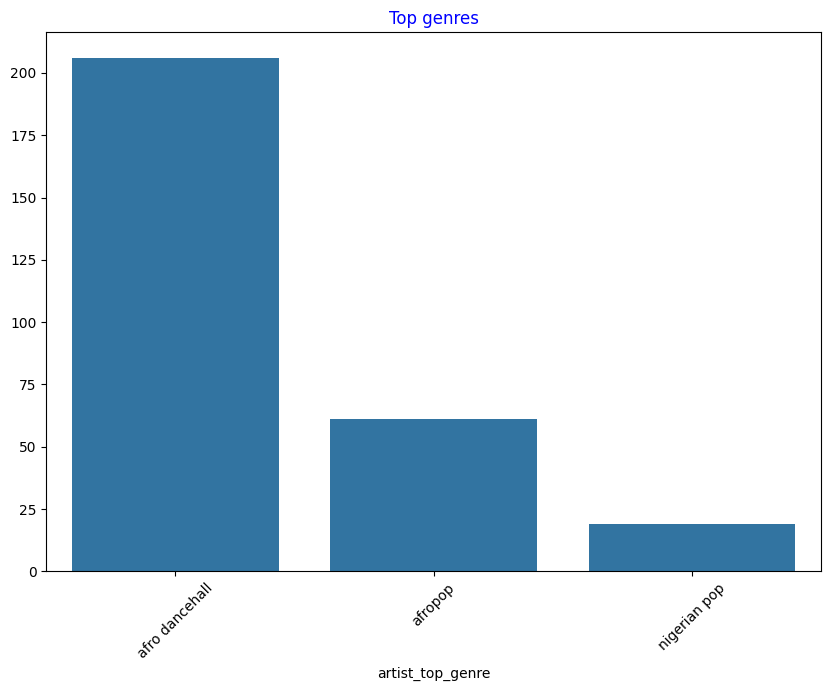

In [6]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

<Axes: xlabel='release_date'>

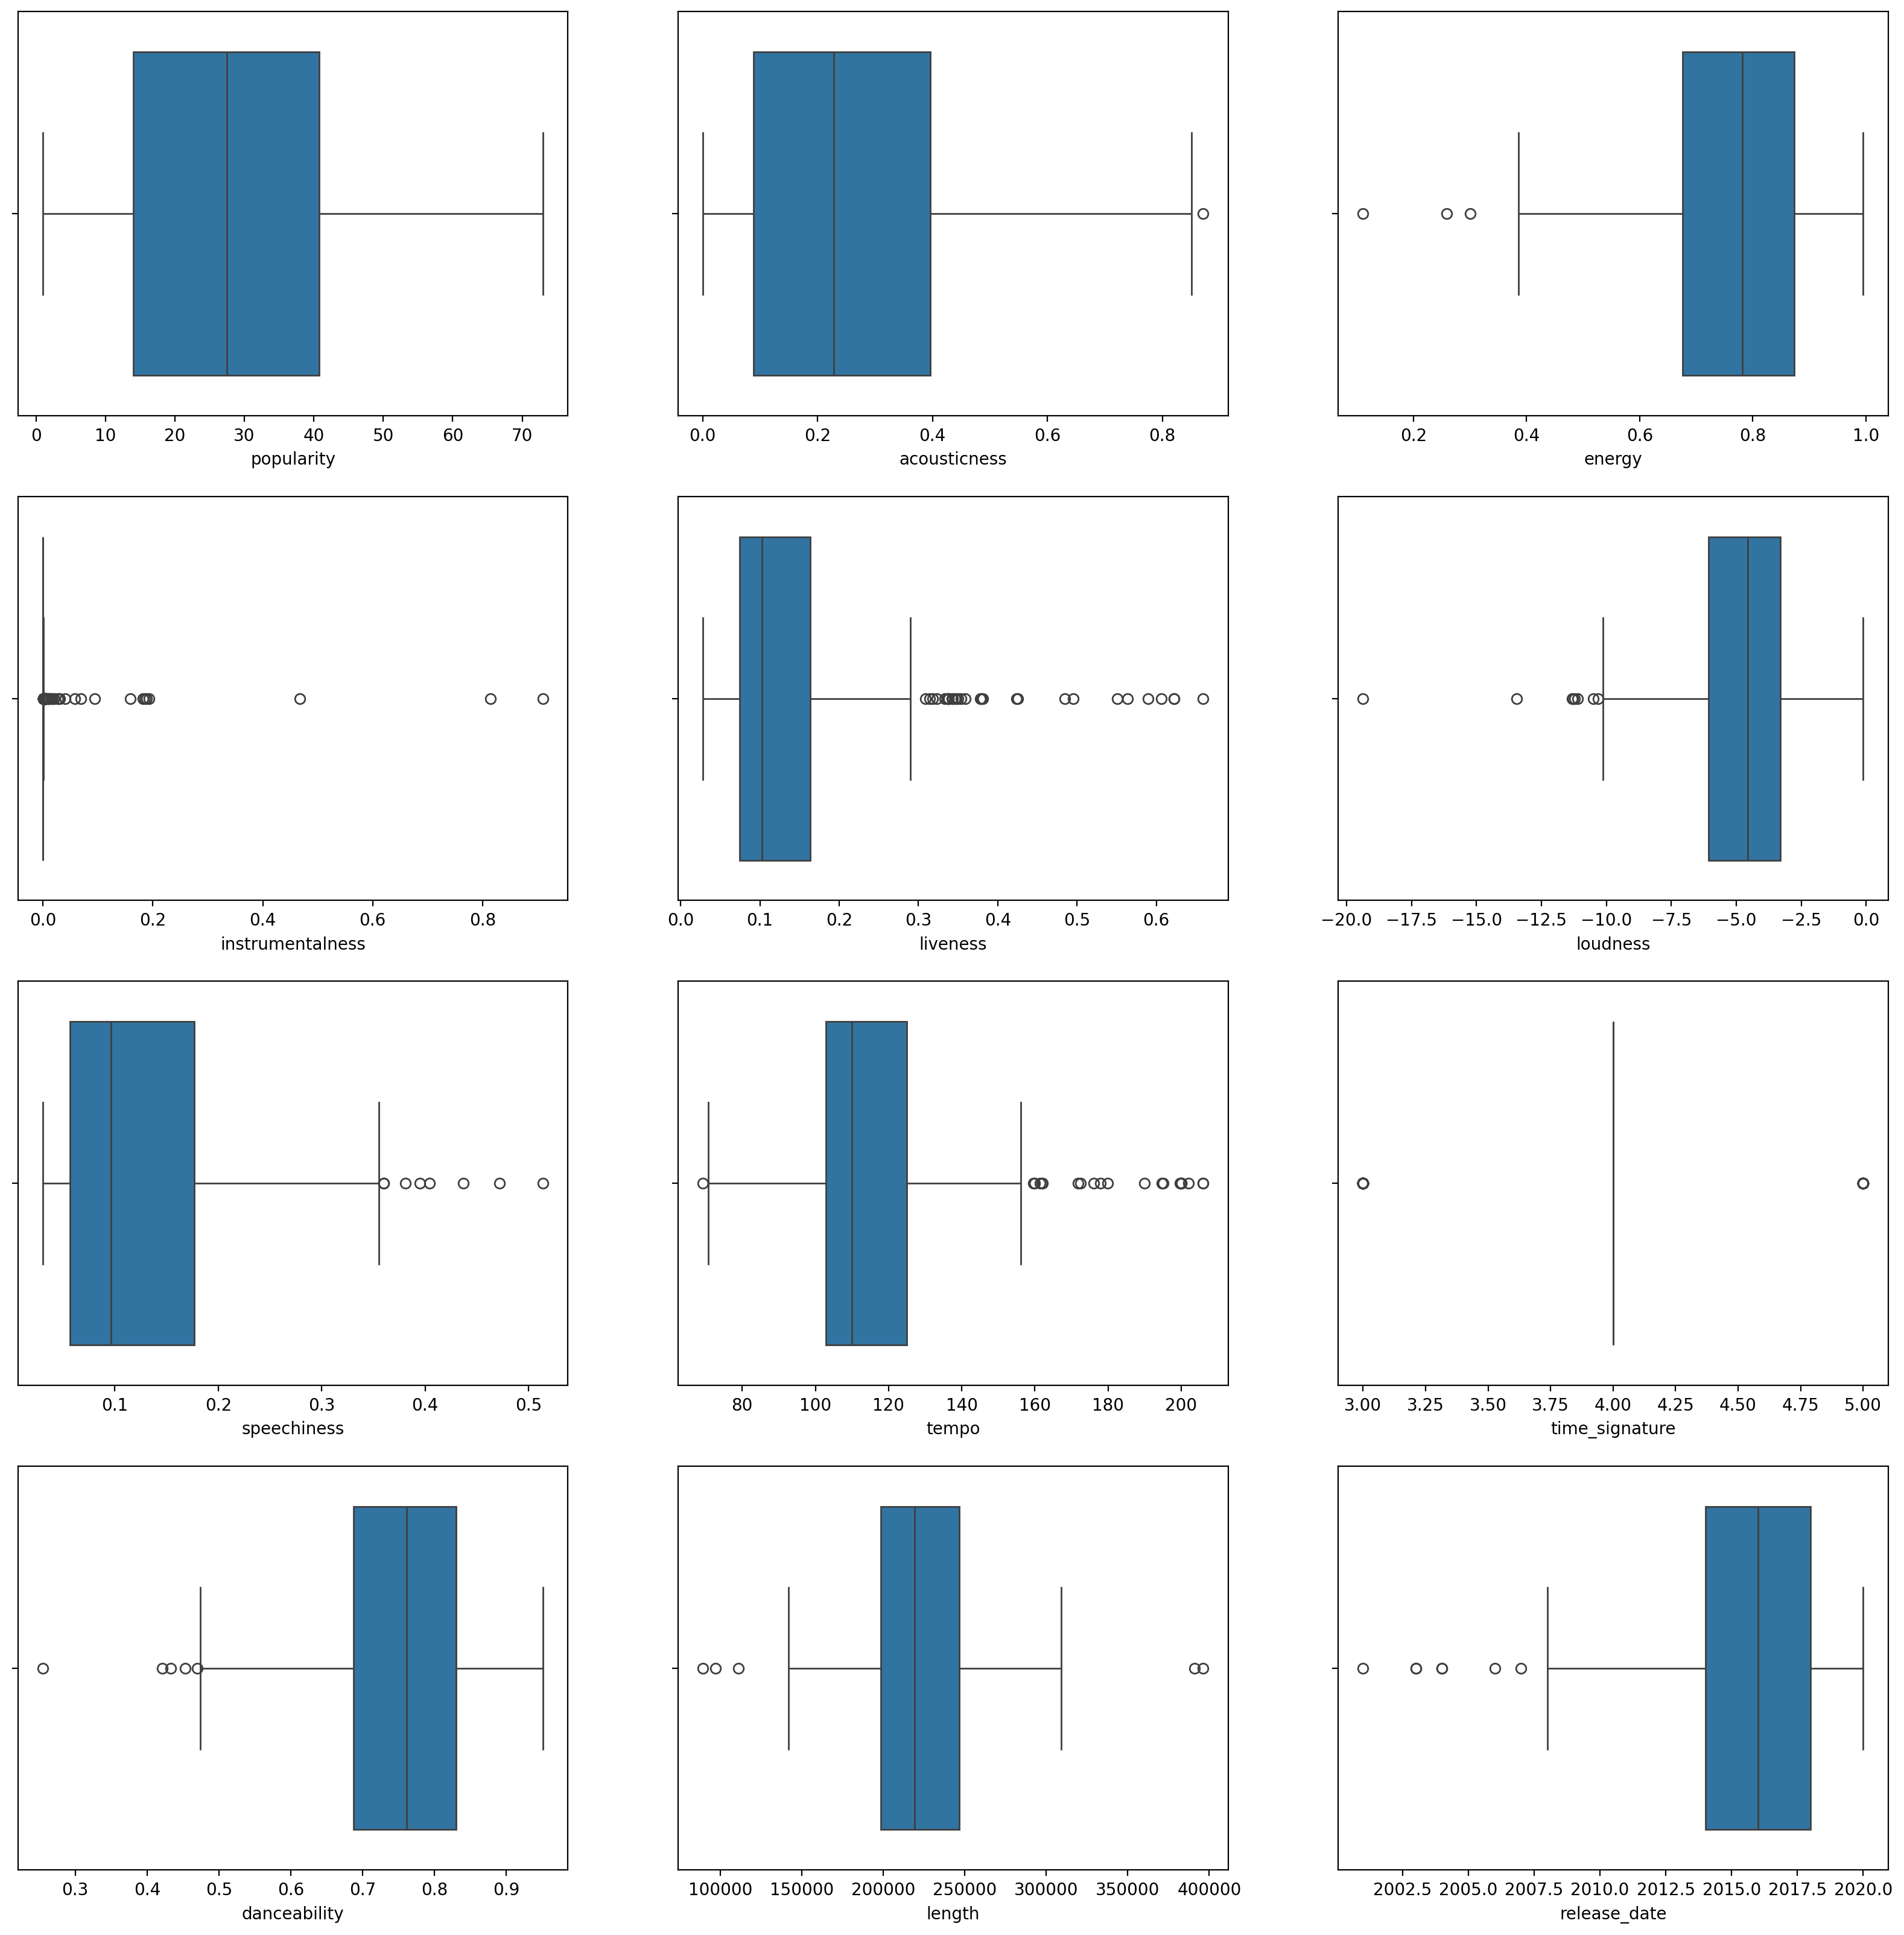

In [7]:
# Create a boxplot to look at the songs data
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

Could go through the dataset and remove these outliers, but that would make the data pretty minimal

For now, choose which columns will be used for clustering. Pick ones with similar ranges and encode the `artist_top_genre` column as numeric data

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = df.loc[:, ('artist_top_genre', 'popularity', 'danceability', 'acousticness', 'loudness', 'energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

In [11]:
# Pick how many clusters to target. Try 3 since there's 3 genres carved from the dataset
from sklearn.cluster import KMeans

nclusters = 3
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point 
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0],
      dtype=int32)

Use this array to calculate a 'silhouette score'

In [12]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

This score varies from -1 to 1, if the score is 1 the cluster is dense and well separated from other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.

Our score is 0.54, so right in the middle. This indicates that our data is not particulary well suited to this type of clustering, but lets continue.

## Build a model

In [13]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

- range - the iterations of the clustering process 
- random_state - determines random number generation for centroid initialization
- wcss - "within-cluster sums of squares" measures the squared average distance of all the points within a cluster to the cluster centroid
- inertia: K-Means algorithms attempt to choose centroids to minimize 'inertia', "a measure of how internally coherent clusters are.
-  k-means++: In Scikit-learn you can use the 'k-means++' optimization, which "initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.

## Elbow method
Use the Elbow method to see how many clusters to have

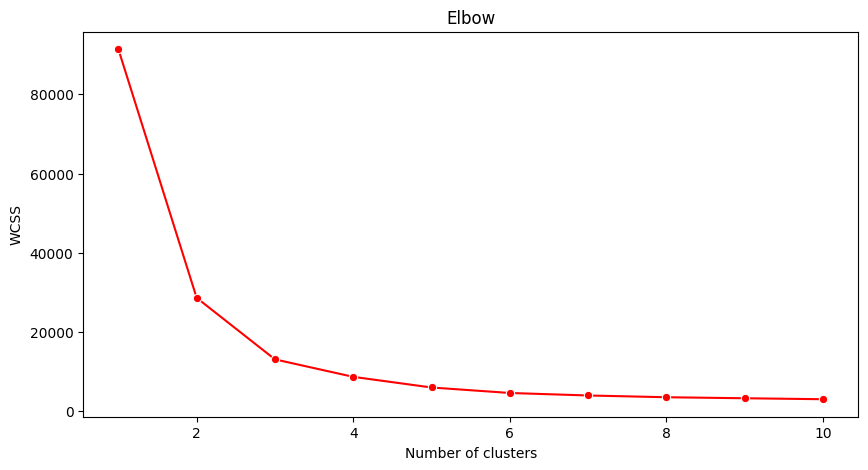

In [14]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Use the `wcss` variable built to create a chart showing where the 'bend' in the elbow is, which indicates the optimum numbers of clusters. Maybe it is 3

## Display the clusters

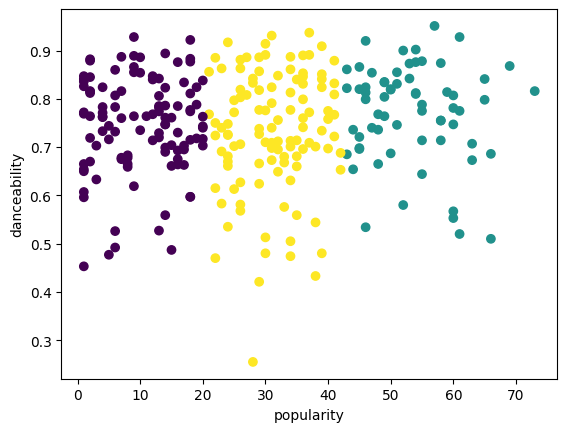

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'], df['danceability'], c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()


Check the models accuracy

In [16]:
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels/float(y.size)))

Result: 111 out of 286 samples were correctly labeled.
Accuracy score: 0.39


This model's accuracy is not very good and the shape of the clusters give a hint why

This data is too imbalanced, too little correlated and there is much variance between the column values to cluster well. In fact, the clusters that form are probably heavily influenced or skewed by the three genre categories we defined above. 

In Scikit-learn documentation you can see that a model like this one, with clusters not very well demarcated has a 'variance' problem https://github.com/microsoft/ML-For-Beginners/raw/main/5-Clustering/2-K-Means/images/problems.png

## Variance

Variance is defined as "the average of the squared differences from the Mean". In the context of this clustering problem it refers to data that the numbers of our dataset tend to diverge a bit too much from the mean